In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [14]:
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [30]:
def LDA_implementation(n_components, original_data):
    X = original_data.data
    y = original_data.target
    num_features = X.shape[1]
    class_labels = np.unique(y)

    overall_mean = np.mean(X, axis=0)
    scatter_within = np.zeros((num_features, num_features))
    scatter_between = np.zeros((num_features, num_features))
    for class_label in class_labels:
        X_class = X[y == class_label]
        class_mean = np.mean(X_class, axis=0)
        scatter_within += (X_class - class_mean).T.dot(X_class - class_mean)
        class_samples = X_class.shape[0]
        mean_diff = (class_mean - overall_mean).reshape(num_features, 1)
        scatter_between += class_samples * mean_diff.dot(mean_diff.T)

    A = np.linalg.inv(scatter_within).dot(scatter_between)
    eigen_values, eigen_vectors = np.linalg.eig(A)
    eigen_vectors = eigen_vectors.T
    idxs = np.argsort(abs(eigen_values))[::-1]
    sorted_eigen_values = eigen_values[idxs]
    sorted_eigen_vectors = eigen_vectors[idxs]
    linear_discriminants = sorted_eigen_vectors[0:n_components].T
    linear_discriminants /= np.linalg.norm(linear_discriminants, axis=0, keepdims=True)
    transformed_data = (X - overall_mean).dot(linear_discriminants)

    return sorted_eigen_vectors, sorted_eigen_values, transformed_data

In [31]:
sorted_eigen_vectors_oneD, sorted_eigen_values_oneD, transformed_data_oneD = LDA_implementation(1, iris)

In [32]:
sorted_eigen_vectors_twoD, sorted_eigen_values_twoD, transformed_data_twoD = LDA_implementation(2, iris)

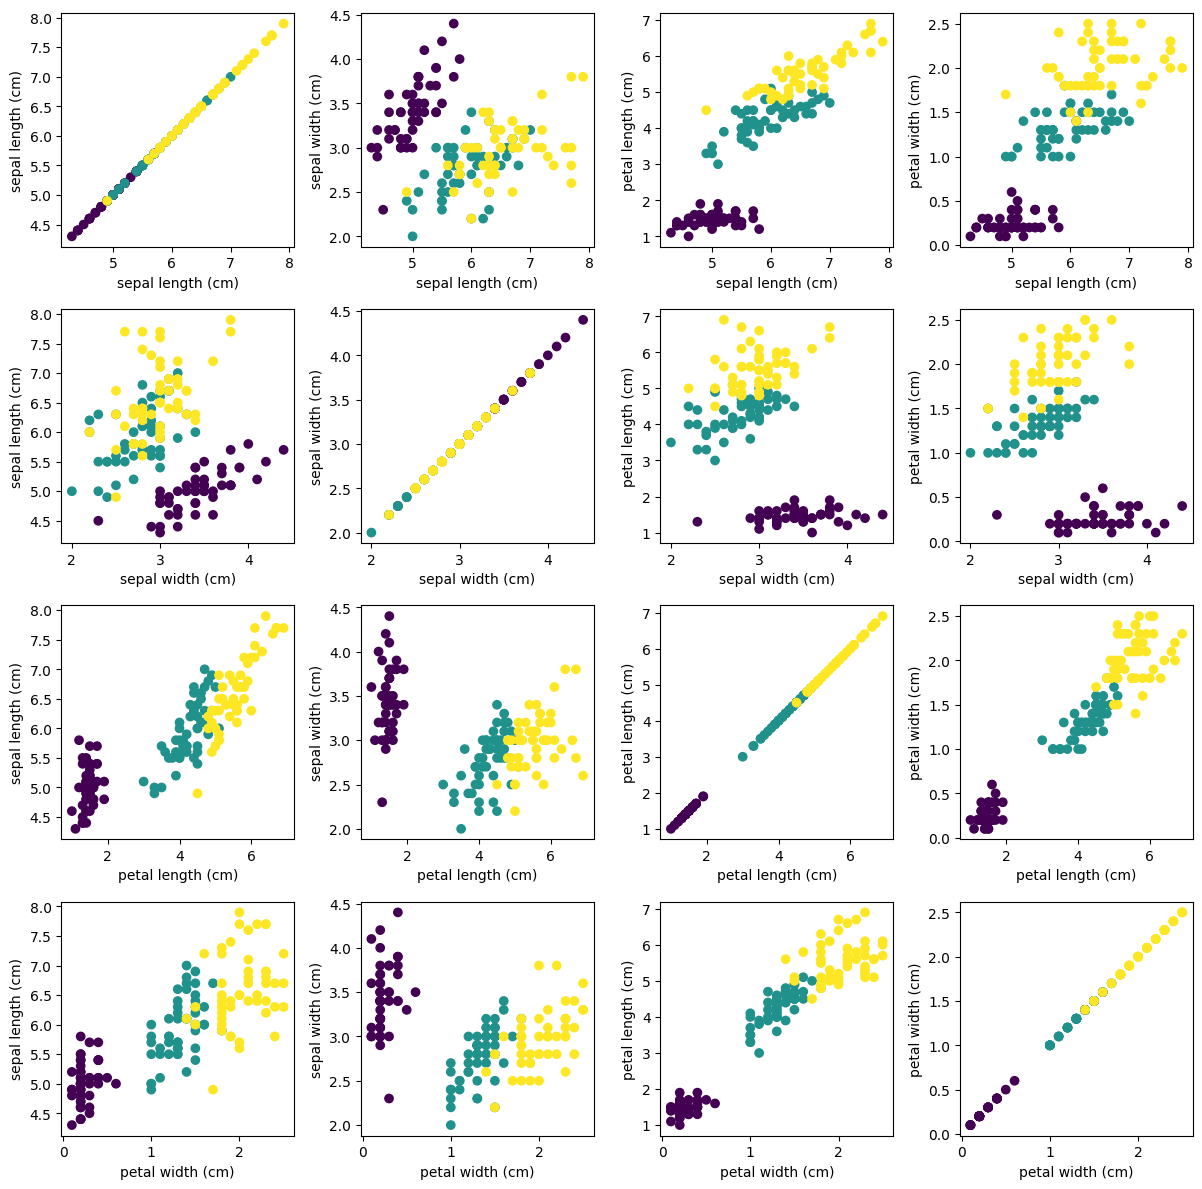

In [15]:
# Plot the original data (4x4-plot figure)
fig, axs = plt.subplots(4, 4, figsize=(12, 12))
for i in range(4):
    for j in range(4):
        axs[i, j].scatter(X[:, i], X[:, j], c=y)
        axs[i, j].set_xlabel(iris.feature_names[i])
        axs[i, j].set_ylabel(iris.feature_names[j])
plt.tight_layout()
plt.show()

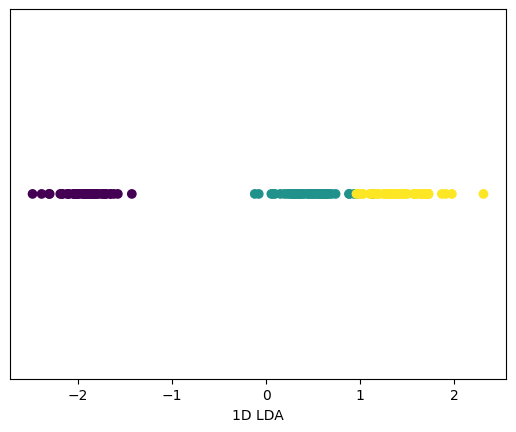

In [33]:
# Plot the transformed data in 1D
plt.scatter(transformed_data_oneD, [0] * len(transformed_data_oneD), c=y)
plt.xlabel("1D LDA")
plt.yticks([])
plt.show()

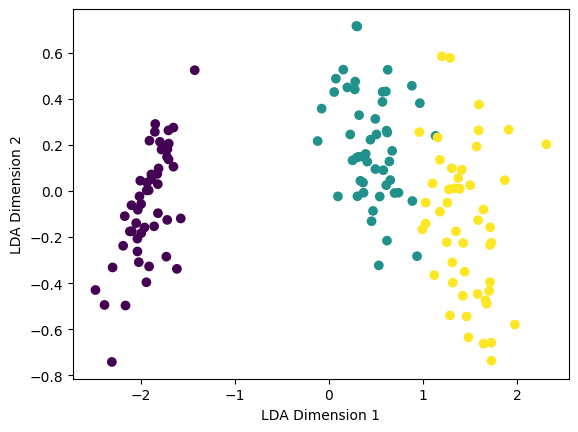

In [34]:
# Plot the transformed data in 2D
plt.scatter(transformed_data_twoD[:, 0], transformed_data_twoD[:, 1], c=y)
plt.xlabel("LDA Dimension 1")
plt.ylabel("LDA Dimension 2")
plt.show()

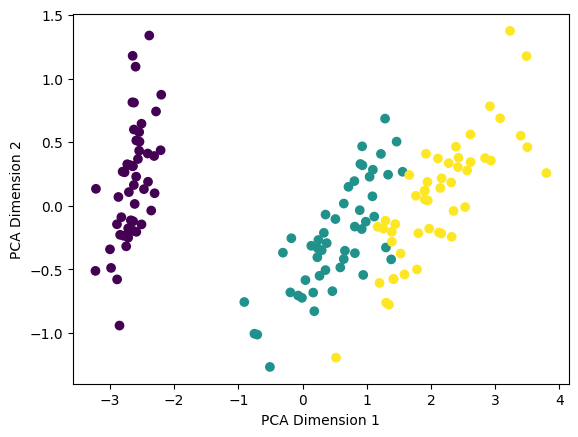

In [24]:
# Perform PCA for dimensionality reduction to 1 dimension
pca = PCA(n_components=2)
X_pca_twod = pca.fit_transform(X)

# Plot the transformed data in 2D
plt.scatter(X_pca_twod[:, 0], X_pca_twod[:, 1], c=y)
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.show()

The reduced one-dimensional space is overcrowded, leading to overlapping or insufficiently separated class distributions.
For the 2d class separability is much better.

Compare the 2D reduced data using LDA with your 2D reduced data using PCA
(in the previous assignment).
What differences do you notice? Does it make sense regarding the definitions of
PCA and LDA?

From the two graphs it seems there is a better class deffernetiation with LDA which agrees with the definition that LDA descriminates between classes and PCA captures variability.